<font color="blue"> Pragna Yelamanchili </font>

# <font > I. Introduction </font>


*The objective of this code is to perform classification models on the datasets(training and testing) using the following algorithms: *

**1. Pocket Algorithm**<br>
**2. Quadratic Discriminant Analysis**<br>
**3. Linear Discriminant Analysis**<br>
**4. Logistic Regression ** 

*The algorithms implemented in this notebook are applied to Adult dataset. Experiment have been performed by partitioning the dataset into training and testing and then the results are compared.*

# II. Data

## Dataset Details

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

** Below are the details of the Feature Values or Attributes present in the dataset **
1. Attributes:>50K, <=50K
2. age: continuous
3. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
4. fnlwgt: continuous
5. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,    10th, Doctorate, 5th-6th, Preschool
6. education-num: continuous
7. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
8. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-    inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
9. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
10. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
11. sex: Female, Male
12. capital-gain: continuous
13. capital-loss: continuous
14. hours-per-week: continuous
15. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,       Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,     Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,       El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands


# Source of the Data
https://archive.ics.uci.edu/ml/datasets/Census+Income

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import math

df = pd.read_csv("adult.data.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Maritial-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                32561 non-null float64
Workclass          32561 non-null object
Fnlwgt             32561 non-null int64
Education          32561 non-null object
Education-num      32561 non-null int64
Maritial-status    32561 non-null object
Occupation         32561 non-null object
Relationship       32561 non-null object
Race               32561 non-null object
Sex                32561 non-null object
Capital-gain       32561 non-null int64
Capital-loss       32561 non-null int64
Hours-per-week     32561 non-null int64
Native-country     32561 non-null object
Income             32561 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [3]:
df.dtypes

Age                float64
Workclass           object
Fnlwgt               int64
Education           object
Education-num        int64
Maritial-status     object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital-gain         int64
Capital-loss         int64
Hours-per-week       int64
Native-country      object
Income              object
dtype: object

In [4]:
df.isnull().sum()

Age                0
Workclass          0
Fnlwgt             0
Education          0
Education-num      0
Maritial-status    0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital-gain       0
Capital-loss       0
Hours-per-week     0
Native-country     0
Income             0
dtype: int64

This step is computed for checking of there are any missing values in the data set. As there is not missong data we can proceed to the further preprocessing steps.

In [5]:
df['Income'].replace({ ' <=50K': 0, ' >50K' : 1}, inplace=True)

This is used to replace the income level into two categories <=50K as 0 and >50K as 1.

# Correlation Matrix

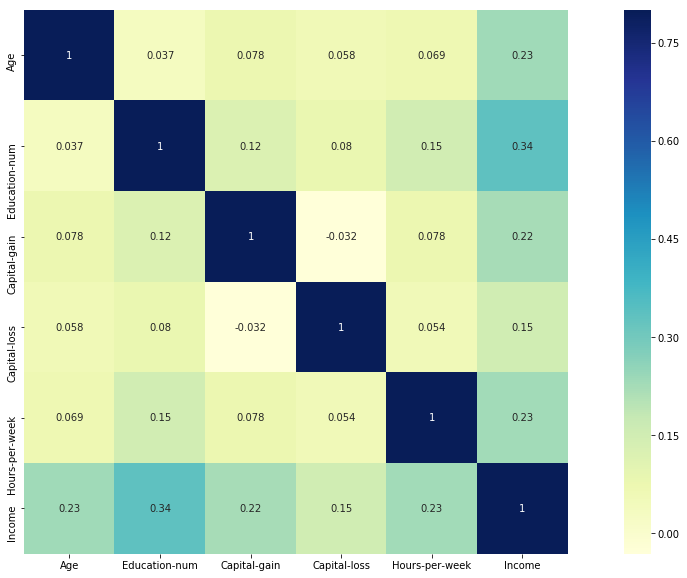

In [6]:
correlation_matrix = df[["Age","Education-num","Capital-gain","Capital-loss","Hours-per-week","Income"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
cmap = sns.diverging_palette(660,660, as_cmap=True)
sns.heatmap(correlation_matrix, cmap="YlGnBu",vmax=.8, square=True,annot=True)

A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable in the table is correlated with each of the other values in the table. This allows you to see which pairs have the highest correlation.
The above correlation matrix is plotted foe Age, Education-num, Capital-gain, Capital-loss, Hours-per-week, Income. When we check the correlation for Age with other attributes, the highest relation is for Income. The higher the age the higher the income. And the value is 0.23.

# Box Plot

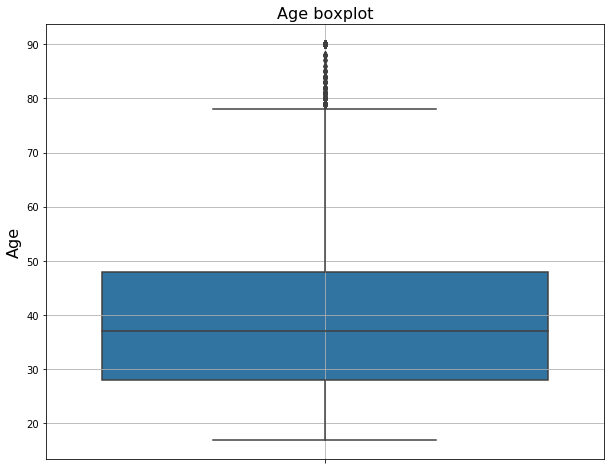

In [7]:
plt.figure(figsize=(10,8))
age=df[(df['Age']>=17) & (df['Age']<=90) ]
sns.boxplot( y=age['Age'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.grid()
plt.show();

This is the box plot for Age. Most of the people are in the age group of 28 to 48. There are also outliers plotted on the graph. People over the age of 78 are considered as outliers. And the median is 37.

# Bar Plot

Text(0.5,0,'Occupation')

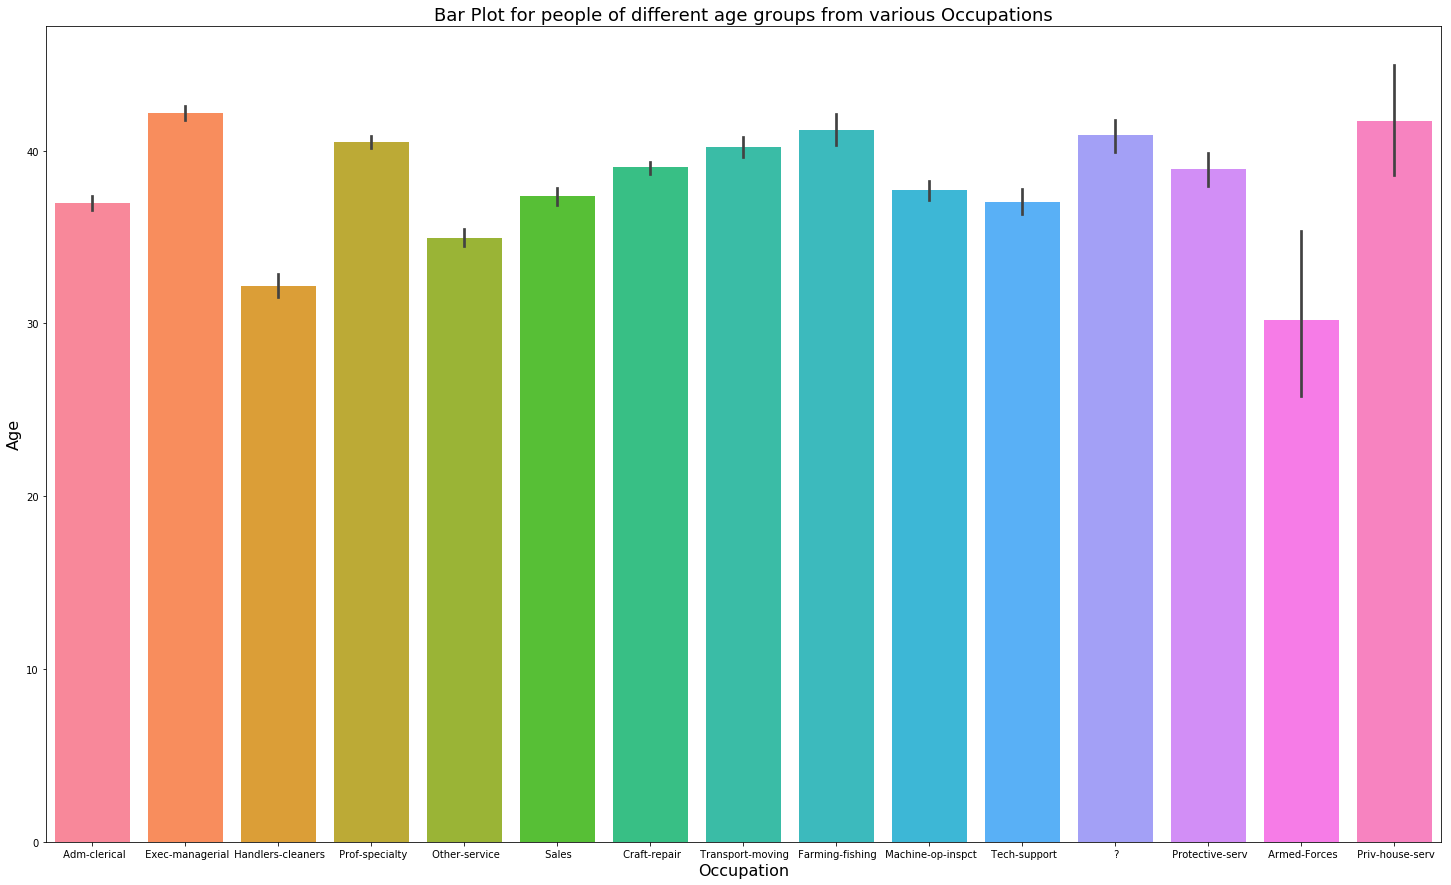

In [8]:
plt.subplots(figsize=(25,15))
df["Income"].replace({""})

sns.barplot(x='Occupation',y='Age',  data=df, saturation=1 )
plt.title('Bar Plot for people of different age groups from various Occupations', fontsize = 18)
plt.ylabel('Age',fontsize = 16)
plt.xlabel('Occupation',fontsize = 16)

The above bar graph is plotted between Occupation on the X-axis and Age on the Y Axis. People around the age 43 are working as Executive managerials roles. People at the age of 30 are working for Armed Forces.

# Pie Chart

Text(0,0.5,'% of income levels')

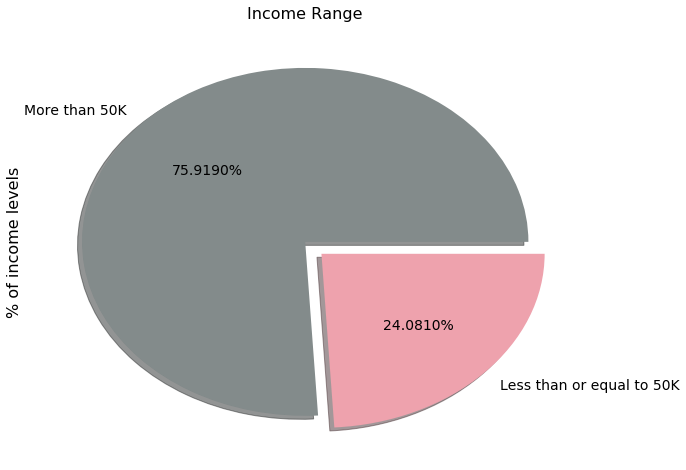

In [9]:
plt.subplots(figsize=(10,8))
colors=["#838B8B", "#EEA2AD"]
labels = 'More than 50K', 'Less than or equal to 50K'
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.4f%%',shadow=True, colors=colors, labels=labels,fontsize=14)
plt.title('Income Range', fontsize = 16)
plt.ylabel('% of income levels',fontsize = 16)


The Pie-Chart shows the percentage of people with two income levels. we have 75.9190% of people with the income morethan 50K and 24.0810% of people are with the income level less than or equal to 50K

# Bar Plot

Text(0.5,0,'Maritial Status')

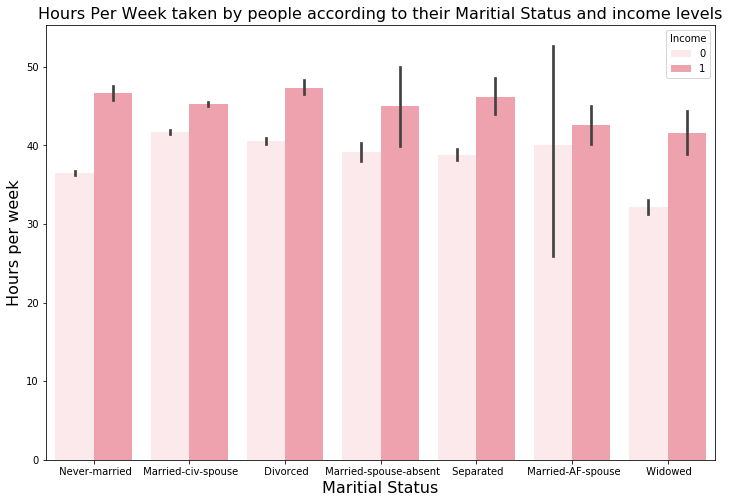

In [10]:
plt.subplots(figsize=(12,8))
df["Income"].replace({""})

sns.barplot(x='Maritial-status',y='Hours-per-week', hue='Income', data=df, saturation=1,color = "#EEA2AD" )
plt.title('Hours Per Week taken by people according to their Maritial Status and income levels', fontsize = 16)
plt.ylabel('Hours per week',fontsize = 16)
plt.xlabel('Maritial Status',fontsize = 16)

The bar graph shows the hours per week taken by people according to their maritial status and income levels.
In all the cases people with income more than 50K are more in number then people with less than or equal to 50K. And people who work more hours per week earn more than 50K.

# Scatter Plot

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


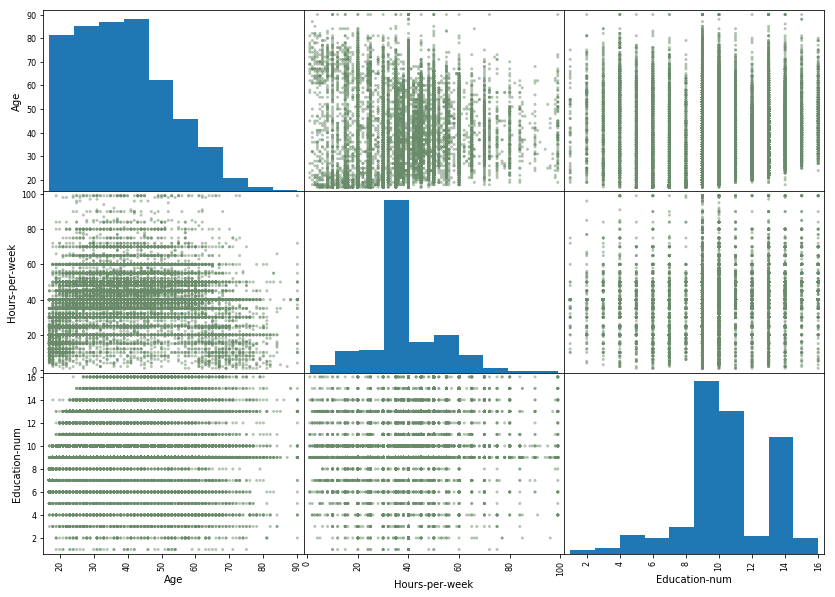

In [11]:
from pandas.tools.plotting import scatter_matrix

attributes = ['Age','Hours-per-week','Education-num']
scatter_matrix(df[attributes], figsize = (14,10), color = "#698B69")
plt.show()

The above representation shows the Scatter plot for Age, Hours-per-week and Education-num.

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


### A. Super Class Definition
1. ** Normalization :** Used for the scaling of the features on the data by subtracting each item with the mean value and then dividing it by the standard deviation.

2. **Partitioning :** To divide the data set into two parts, train and test data. On the train data, we apply the algorithm and make the model learn the algorithm and in the test step, we apply the results of the learning model to predict the outcome.

In [12]:
import numpy as np
import abc

# Super class for machine learning models 

class BaseModel(abc.ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abc.abstractmethod
    def train(self, X, T):
        pass

    @abc.abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

# B. Pocket Algorithm for Training Perceptron

The Pocket Algorithm is an extension of the Perceptron Algorithm. This algorithm is used for training the Perceptron.
The Perceptron algorithm is used for supervised learning of binary classifiers that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not. It is a type of linear classifier. The algorithm allows for online learning, in that it processes elements in the training set one at a time.
A single perceptron is a linear model that applies a step function on the linear output. 
For classification, it iterates over the training examples, and update the weights in a way that would result in correct classification. The weights are updated as follows:

$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$

Once the weight is updated, on each iteration the weight is compared to check if it is better than the previous weight. If so the algorithm stores the best weight in its pocket.
Thus, $w_{pocket}$ will contain the best solution so far. 

##  Implementation: PocketAlgorithm class and its methods 

- **train method: **  Once the data is explored and partitioned to training set and a test set and apply transformation pipelines such as feature scaling to clean up and prepare the data for Machine Learning algorithms, we then select and train a Machine Learning model in the train method. The train method is where we compute the weights. We first check if the prediction on each of the training example computed using the previous value of weight is equal to the target train sample (we check the signs). If the signs are different we update the weight accordingly and call the compare method. The result of the compare method says which of the weights are better and stores the best weight in the pocket.

- **use method: ** After tweaking the models for a while, we eventually have a system that performs sufficiently well. The model makes a prediction by computing a weighted sum of the input features. We now evaluate the final model on the test set with the pocket weights.

- **the self variable** is used like a reference to the current object

- **the class contains two attributes:** the learning rate alpha to decide on how much step must the weight increase/decrease on each iteration and the w_pocket to store the best value of the weight

In [13]:
from copy import deepcopy as copy 
import matplotlib.pyplot as plt
class PocketAlgorithm(Classifier):

   # return 1 if w is better -1 if wp is better
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    
    # training Pocket Algorithm 
    def train(self, X, T):
        X = self.normalize(X)
        X = self.add_ones(X)
        
        m = np.shape(X)[0]        
        maxiter = 500
        alpha = 0.1
        
        self.w = np.zeros(np.shape(X)[1])
        w_pocket = copy(self.w)
        w_pocket
        for i in range(maxiter):
            converged = True
            for k in np.random.permutation(m):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    converged = False
                    self.w += alpha * T[k] * X[k]
                    
                    if self.compare(X, T, self.w, w_pocket) > 0: 
                        w_pocket[:] = self.w[:]
            if converged:
                break
        self.w = w_pocket
     # apply the learned model to data X   
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        return np.sign(X @ self.w)

### C. QDA

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
$


For a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 

Using this inequality and the Gaussian Assumption, we can come up with following inequality: 

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)
$$

*Gaussian Assumption:*
$$
p(\xv \mid T = k) = \frac{1}{(2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}}} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) }.
$$


Since both terms have the same cosmetics, we can define the discriminant function $\delta_k(\xv)$ as

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

In QDA analysis, our job is to find the class which gives maximum probability for the above discriminant function.

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

## Implementation
The QDA algorithm is implemented by QDA class defined below. 
* **train method: **  class initializes variables "prior" (Probability of the classes), "sigma" (covariance), "mu" (mean of the class). It also performs normalization of the input X values
* **use method: **  calculates discriminant for each class and returns the class with highest value of discriminant in the output. The input to this function is also normalized before processing

In [14]:
class QDA(Classifier):
    def train(self, X, T): 
        # Initialize
        self.classes = np.unique(T)
        self.prior = []
        self.sigma = []
        self.mu = []
        
        # Normalize Input
        X = self.normalize(X) 
        N = np.shape(X)[0]
        
        # Calculate prior probability, sigma & mu
        for i, k in enumerate(self.classes):
            indices = np.where(T == k)[0]
            self.prior.append(len(indices) / N)
            self.sigma.append(np.cov(X[indices].T))
            self.mu.append(np.mean(X[indices], 0))
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        d = []
        
        # Calculate discriminant
        for i, k in enumerate(self.classes):
            sigma_inv = np.linalg.inv(self.sigma[i])
            diffv = X - self.mu[i]
            d.append(-0.5 * np.log(np.linalg.det(self.sigma[i])) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(self.prior[i]))
        # Read index of largest discriminant
        T = np.argmax(d, 0)
        return [self.classes[t] for t in T]

### D. LDA
The problems with QDA are:
* Maintaining the covariance matrix for each class is not cheap
* The data is under-sampled, the resulting class boundary has high chance of over-fitting

LDA instead use same covariance for all classes
Let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$. 

$$
\begin{align*}
\delta_+(\xv) &> \delta_-(\xv) \\ 
 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ + \ln P(T = +1) &>  \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- - \frac{1}{2}\boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_-  + \ln P(T = -1)
\end{align*}
$$

From the above equation (same as QDA), we can remove the quadratic term in our discriminant function and we will end up with: 

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$

## Implementation
The LDA algorithm is implemented by LDA class defined below. 
* **train method: ** class initializes variables "prior" (Probability of the classes), "sigma" (covariance), "mu" (mean of the class). It also performs normalization of the input X values
* **use method: ** calculates discriminant for each class and returns the class with highest value of discriminant in the output. The input to this function is also normalized before processing

In [15]:
class LDA(Classifier):
    def train(self, X, T):        
        self.classes = np.unique(T)
        self.prior = {}
        self.mu = {}
        
        X = self.normalize(X) 
        N = np.shape(X)[0]
        
        self.sigma = np.cov(X.T)
        
        for k in self.classes:
            indices = np.where(T == k)[0]
            self.prior[k] = len(indices) / N
            self.mu[k] = np.mean(X[indices], 0)
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        N = np.shape(X)[0]
        T = []
        d = {}
        sigma_inv = np.linalg.inv(self.sigma)
        
        for k in self.classes:
            d[k] = np.sum(np.dot(X, sigma_inv) * self.mu[k] \
                - 0.5 * np.dot(self.mu[k], sigma_inv) * self.mu[k] \
                + np.log(self.prior[k]), axis=1)
        
        for n in range(N):
            max_d = -math.inf
            max_k = None
            for k in self.classes:
                if d[k][n] > max_d:
                    max_k = k
                    max_d = d[k][n]
                T.append(k)
        return T

### E. Logistic Regression

Logistic regression model predicts $P(T=k \mid \xv)$ for every class k. Reconsidering the Linear Regression model:
$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus, for Logistic Regression we have:

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = y.
$$

The error function for Logistic Regression is defined as:
$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$
It is also called *cross-entropy* error function.

Applying Gradient Descent on this error function:
$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{*,j} - g_j(\Xm)\Big).
$$

## Implementation
The Logistic Regression algorithm is implemented by the class define below. The purpose of each method is as follows:
* **softmax method** for the Logistic Regression is implemented in the "softmax" method. 
* **g method** computes the dot product of input and weight and pass the result to the "softmax" function
* **train method**generates weights with 1000 iterations. Learning rate is taken as 0.1
* **use method**uses the weights to calculate probability for each class and returns class with highest probability

In [16]:
class LogisticRegression(Classifier):
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def g(self, X, w):
        return self.softmax(X @ w) 
    
    def train(self, X, T):
        self.classes = np.unique(T).tolist()
        X = self.normalize(X)
        X = self.add_ones(X)
        
        niter = 1
        alpha = 0.1
        self.w = np.random.rand(np.shape(X)[1], len(self.classes))
        Tmatrix = np.zeros((np.shape(X)[0], len(self.classes)))
        
        for i,t in enumerate(T):
            Tmatrix[i][self.classes.index(t)] = 1
            
        for step in range(niter):
            y = self.g(X, self.w)
            self.w += alpha * X.T @ (Tmatrix - y)
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        T = np.argmax(self.g(X, self.w), 1)
        return [self.classes[t] for t in T]

### Partition data

In [17]:
train = df.sample(frac = .75)
test = df.sample(frac = .25)
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Maritial-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## Experiment on Pocket Algorithm

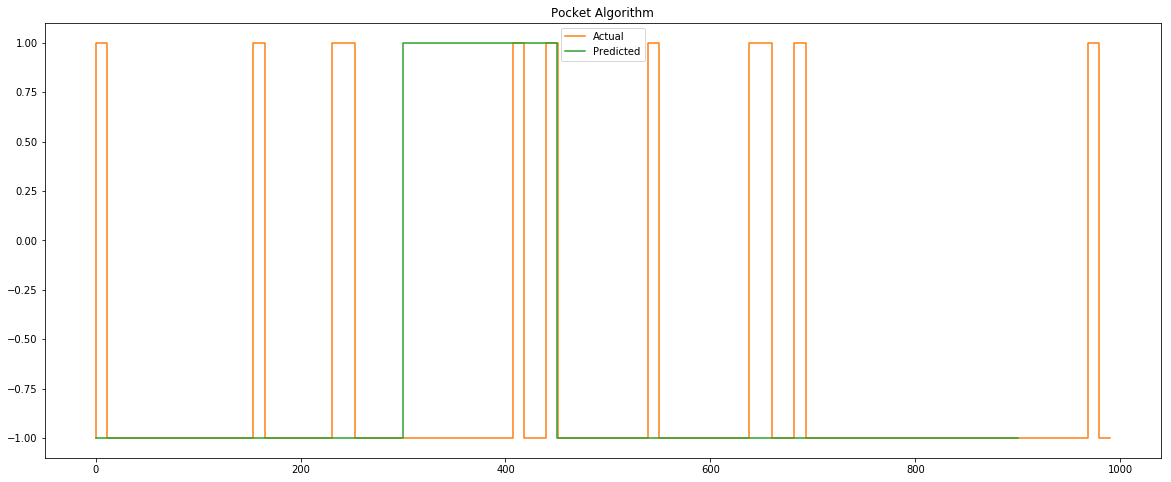

In [18]:
classifier = PocketAlgorithm()
X = train.sample(1000)
Y = [-1 if y == 0 else 1 for y in X['Income'].values ]
m = np.shape(X)[0]
classifier.train(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values, Y)
T = classifier.use(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values)
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::11], Y[0::11], label='Actual', color='C1')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='C2')
plt.title('Pocket Algorithm')
plt.legend()
plt.show()

### Confusion Matrix for Pocket Algorithm (Train Dataset)

In [19]:
matrix = pd.crosstab(pd.Series(X['Income'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary of the model: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class 0(people who have default payment)
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision for decision value 0: ' + str(precision))
print('Recall for decision value 0: ' + str(recall))

print()

## Precision & recall for class 1(people who don't have default payment)
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision for decision value 1: ' + str(precision))
print('Recall for decision value 1: ' + str(recall))

matrix

Accuary of the model: 83.4%

Precision for decision value 0: 0.87
Recall for decision value 0: 0.85

Precision for decision value 1: 0.45
Recall for decision value 1: 0.75


Predicted,0,1
Actual,,
0,728,36
1,130,106


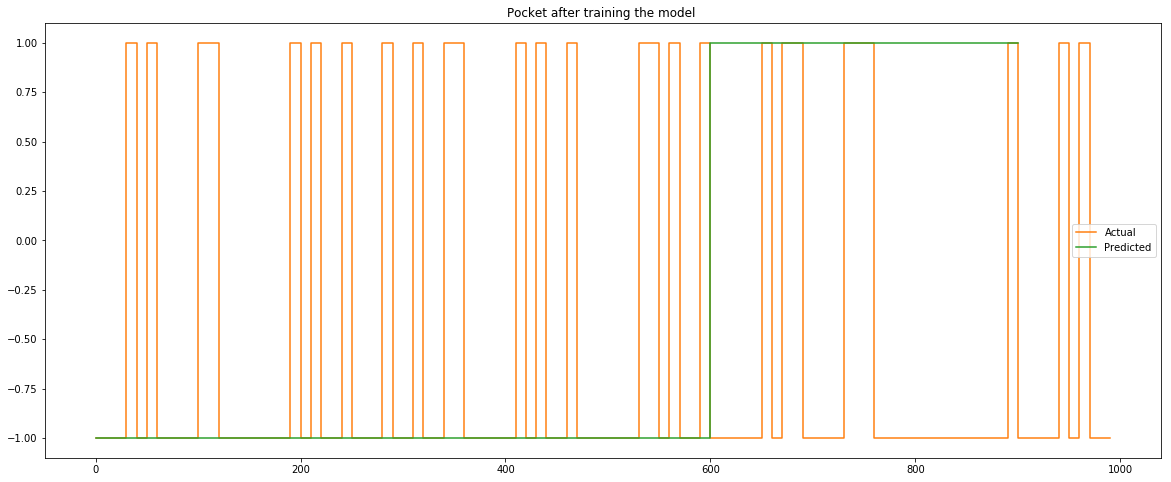

In [20]:
classifier = PocketAlgorithm()
X = train.sample(1000)
Y = [-1 if y == 0 else 1 for y in X['Income'].values ]
m = np.shape(X)[0]
classifier.train(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values, Y)
T = classifier.use(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values)
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::10], Y[0::10], label='Actual', color='C1')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='C2')
plt.legend()
plt.title('Pocket after training the model ')
plt.show()

### Confusion Matrix for Pocket Algorithm (After training the model on train dataset and using it to predict on the test dataset)

In [21]:
matrix = pd.crosstab(pd.Series(X['Income'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary of the model: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class 0(people who have default payment)
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision for decision value 0: ' + str(precision))
print('Recall for decision value 0: ' + str(recall))

print()

## Precision & recall for class 1(people who don't have default payment)
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision for decision value 1: ' + str(precision))
print('Recall for decision value 1: ' + str(recall))

matrix

Accuary of the model: 81.5%

Precision for decision value 0: 0.89
Recall for decision value 0: 0.82

Precision for decision value 1: 0.36
Recall for decision value 1: 0.78


Predicted,0,1
Actual,,
0,724,25
1,160,91


**Note:** *For Pocket Algorithm I have taken 5000 samples as it is taking a lot of time to evaluate the results.*
Also there is not much difference in the accuracy also.

## Experiment on QDA

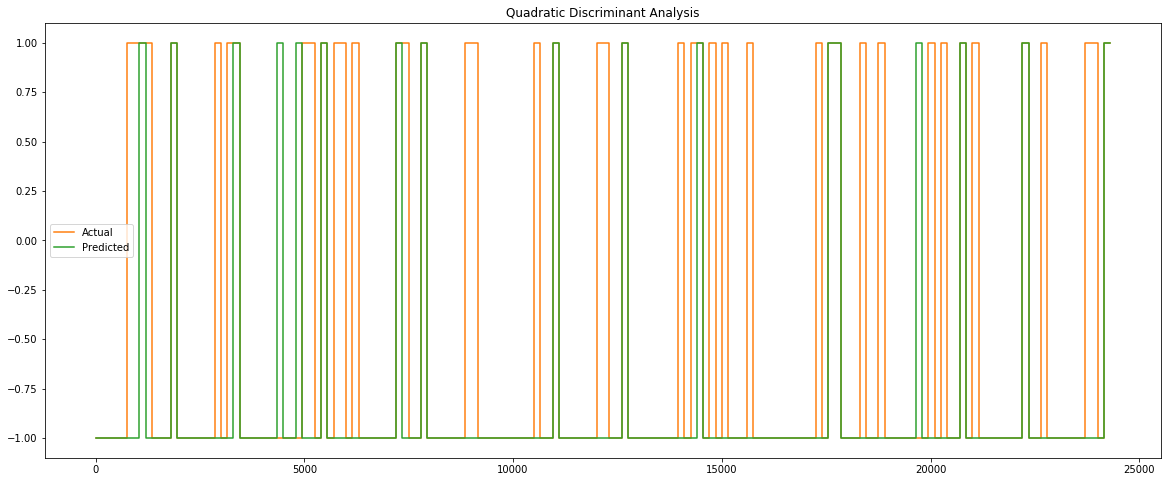

In [22]:
from mpl_toolkits.mplot3d import Axes3D

classifier = QDA()
X = train
Y = [-1 if y == 0 else 1 for y in X['Income'].values ]
m = np.shape(X)[0]
classifier.train(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values, Y)
T = classifier.use(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values)
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='C1')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='C2')
plt.legend()
plt.title('Quadratic Discriminant Analysis')
plt.show()

### Confusion Matrix for QDA (Train Dataset)

In [23]:
matrix = pd.crosstab(pd.Series(X['Income'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary of the model: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class 0(people who have default payment)
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision for decision value 0: ' + str(precision))
print('Recall for decision value 0: ' + str(recall))

print()

## Precision & recall for class 1(people who don't have default payment)
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision for decision value 1: ' + str(precision))
print('Recall for decision value 1: ' + str(recall))

matrix

Accuary of the model: 79.55448179845216%

Precision for decision value 0: 0.91
Recall for decision value 0: 0.81

Precision for decision value 1: 0.3
Recall for decision value 1: 0.67


Predicted,0,1
Actual,,
0,17636,886
1,4107,1792


[-1  1]


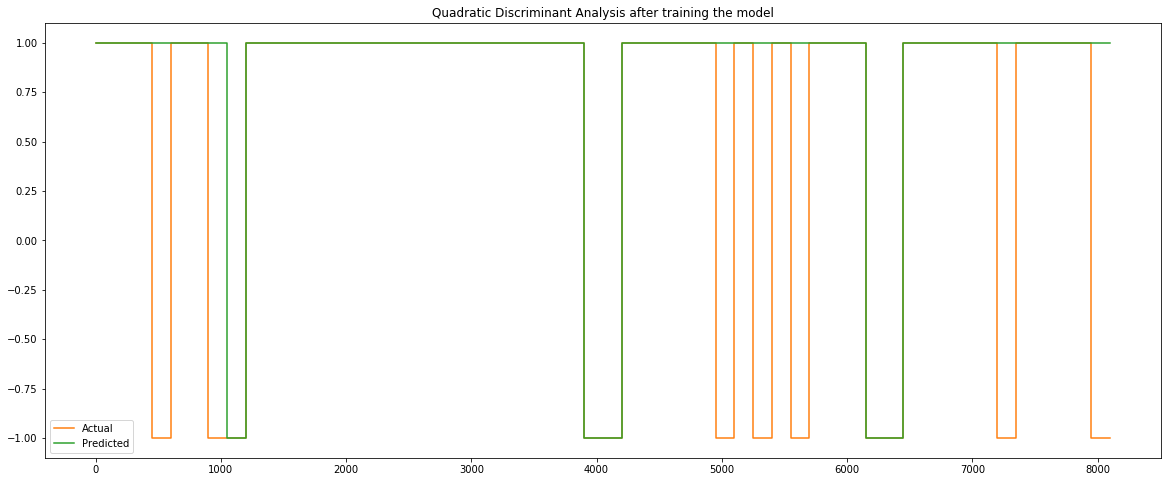

In [24]:
classifier = QDA()
X = test
Y = [-1 if y == 1 else 1 for y in X['Income'].values ]
m = np.shape(X)[0]
classifier.train(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values, Y)
T = classifier.use(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='C1')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='C2')
plt.title('Quadratic Discriminant Analysis after training the model')
plt.legend()
plt.show()

### Confusion Matrix for QDA  (After training the model on train dataset and using it to predict on the test dataset)

In [25]:
matrix = pd.crosstab(pd.Series(X['Income'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary of the model: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class 0(people who have default payment)
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision for decision value 0: ' + str(precision))
print('Recall for decision value 0: ' + str(recall))

print()

## Precision & recall for class 1(people who don't have default payment)
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision for decision value 1: ' + str(precision))
print('Recall for decision value 1: ' + str(recall))

matrix

Accuary of the model: 20.393120393120395%

Precision for decision value 0: 0.18
Recall for decision value 0: 0.33

Precision for decision value 1: 0.69
Recall for decision value 1: 0.19


Predicted,0,1
Actual,,
0,295,5876
1,604,1365


## Experiment on LDA

[-1  1]


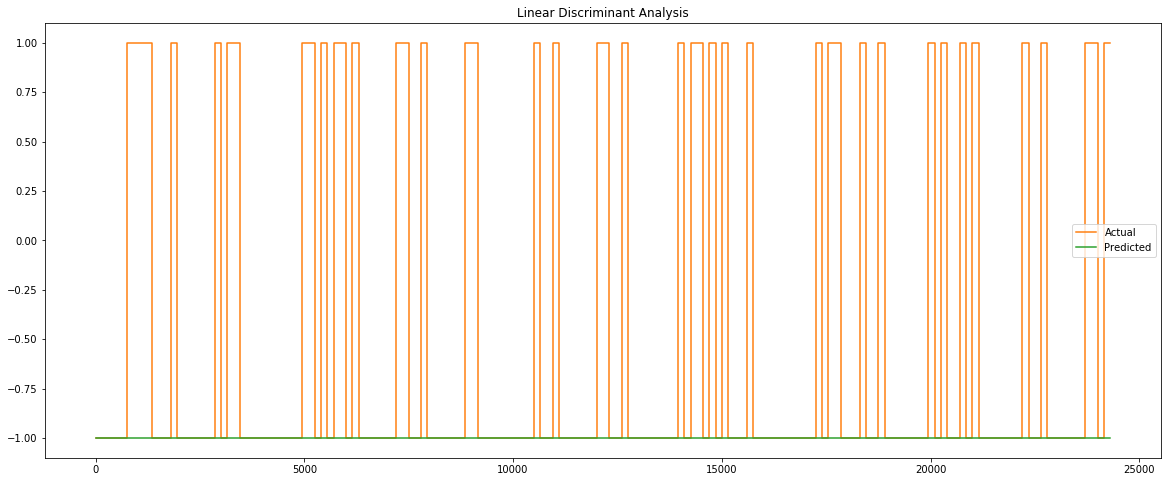

In [26]:
classifier = LDA()
X = train
Y = [-1 if y == 0 else 1 for y in X['Income'].values ]
m = np.shape(X)[0]
classifier.train(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values, Y)
T = classifier.use(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='C1')
plt.step(range(m)[0::150], T[0::300], label='Predicted', color='C2')
plt.legend()
plt.title('Linear Discriminant Analysis')
plt.show()

### Confusion Matrix for LDA (Train Dataset)

In [27]:
matrix = pd.crosstab(pd.Series(X['Income'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision (0): ' + str(precision))
print('Recall (0): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision (1): ' + str(precision))
print('Recall (1): ' + str(recall))

matrix

Accuary: 50.292780803406906%

Precision (0): 0.76
Recall (0): 0.76

Precision (1): 0.51
Recall (1): 0.24


Predicted,0,1
Actual,,
0,9297,9225
1,2914,2985


[-1  1]


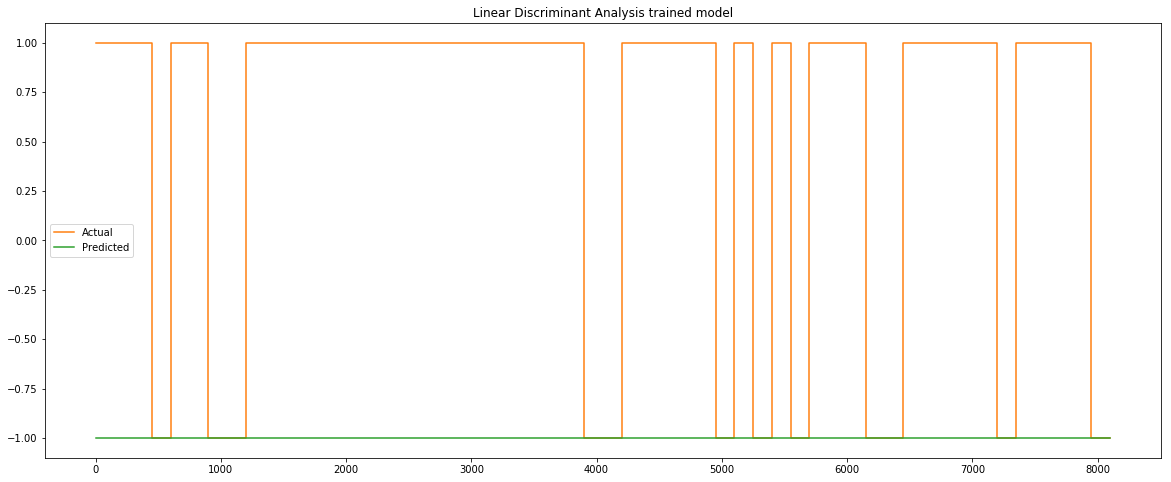

In [28]:
classifier = LDA()
X = test
Y = [-1 if y == 1 else 1 for y in X['Income'].values ]
m = np.shape(X)[0]
classifier.train(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values, Y)
T = classifier.use(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='C1')
plt.step(range(m)[0::150], T[0::300], label='Predicted', color='C2')
plt.legend()
plt.title('Linear Discriminant Analysis trained model')
plt.show()

### Confusion Matrix for LDA  (After training the model on train dataset and using it to predict on the test dataset)

In [29]:
matrix = pd.crosstab(pd.Series(X['Income'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision (0): ' + str(precision))
print('Recall (0): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision (1): ' + str(precision))
print('Recall (1): ' + str(recall))

matrix

Accuary: 49.61916461916462%

Precision (0): 0.76
Recall (0): 0.75

Precision (1): 0.49
Recall (1): 0.24


Predicted,0,1
Actual,,
0,3070,3101
1,1000,969


## Experiment on Logistic Regression

[-1  1]


C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


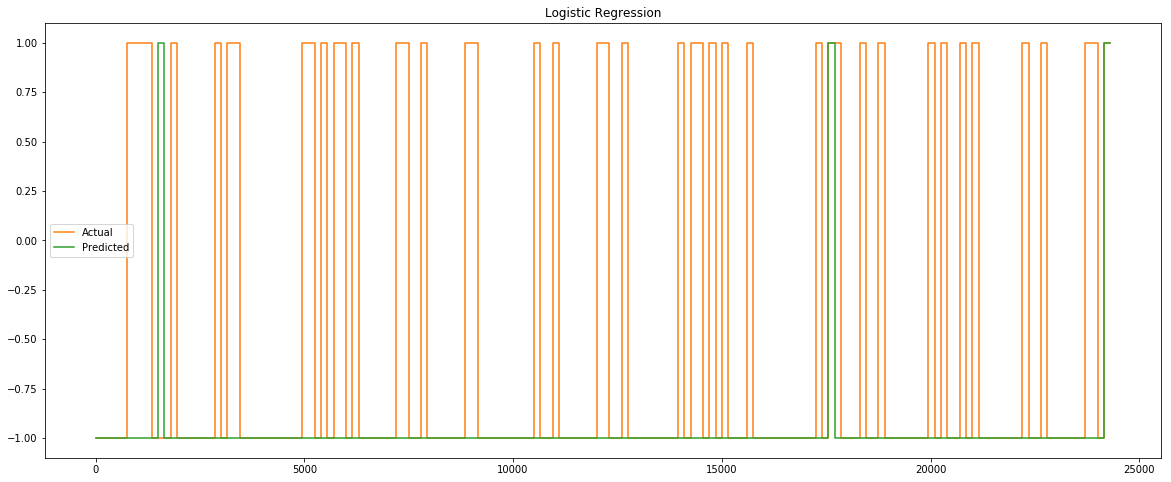

In [30]:
classifier = LogisticRegression()
X = train
Y = [-1 if y == 0 else 1 for y in X['Income'].values ]
m = np.shape(X)[0]
classifier.train(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values, Y)
T = classifier.use(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='C1')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='C2')
plt.legend()
plt.title('Logistic Regression')
plt.show()

### Confusion Matrix for Logistic Regression (Train Dataset)

In [31]:
matrix = pd.crosstab(pd.Series(X['Income'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision (0): ' + str(precision))
print('Recall (0): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision (1): ' + str(precision))
print('Recall (1): ' + str(recall))

matrix

Accuary: 76.7167601654314%

Precision (0): 0.97
Recall (0): 0.77

Precision (1): 0.11
Recall (1): 0.6


Predicted,0,1
Actual,,
0,18108,414
1,5272,627


[-1  1]


C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


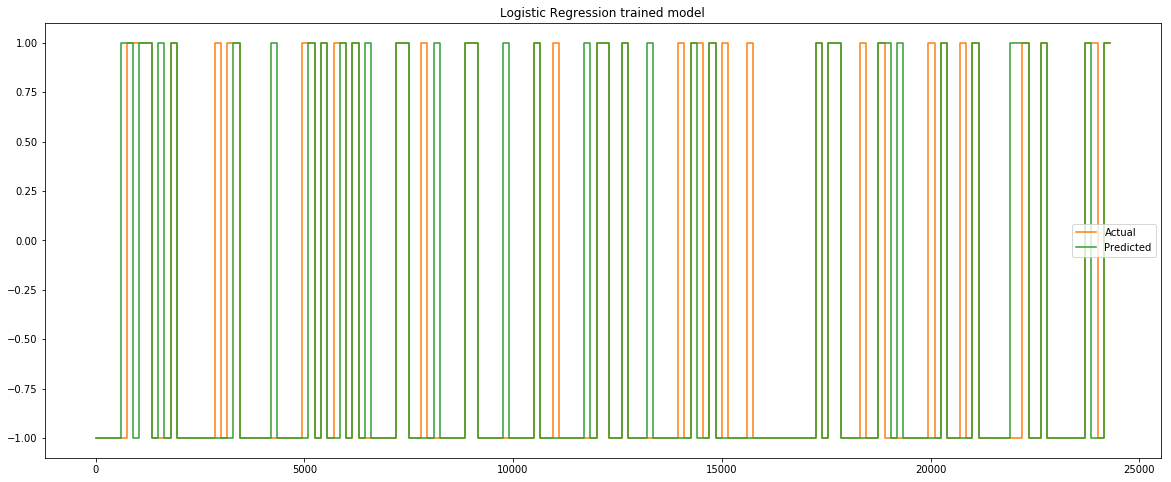

In [32]:
classifier = LogisticRegression()
X = train
Y = [-1 if y == 0 else 1 for y in X['Income'].values ]
m = np.shape(X)[0]
classifier.train(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values, Y)
T = classifier.use(X[['Age', 'Education-num','Capital-gain','Capital-loss', 'Hours-per-week']].values)
print(np.unique(T))
plt.figure(figsize=(20, 8))
plt.step(range(m)[0::150], Y[0::150], label='Actual', color='C1')
plt.step(range(m)[0::150], T[0::150], label='Predicted', color='C2')
plt.legend()
plt.title('Logistic Regression trained model')
plt.show()

### Confusion Matrix for Logistic Regression  (After training the model on train dataset and using it to predict on the test dataset)

In [33]:
matrix = pd.crosstab(pd.Series(X['Income'].values, name='Actual'), pd.Series([0 if t == -1 else 1 for t in T], name='Predicted'))
print('Accuary: ' + str((matrix[0][0] + matrix[1][1]) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix[0][0] / (matrix[0][0] + matrix[1][1]), 2)
recall = round(matrix[0][0] / (matrix[0][0] + matrix[0][1]), 2)
print('Precision (0): ' + str(precision))
print('Recall (0): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix[1][1] / (matrix[1][1] + matrix[0][1]), 2)
recall = round(matrix[1][1] / (matrix[1][1] + matrix[1][0]), 2)
print('Precision (1): ' + str(precision))
print('Recall (1): ' + str(recall))

matrix

Accuary: 77.76094345030916%

Precision (0): 0.84
Recall (0): 0.85

Precision (1): 0.5
Recall (1): 0.54


Predicted,0,1
Actual,,
0,16015,2507
1,2924,2975


## Comparison of the models:
Strategic REGRESSION is a decent direct order calculation. be that as it may, it has certain confinements as beneath: 

1. Two-Class Problems: 

Strategic relapse is expected for double arrangement issues. Despite the fact that, It can be reached out for multi-class characterization, however we have other better calculation for that. 

2. It is Unstable With Separated Classes. 

Strategic relapse can wind up flimsy when the classes are all around isolated. 

3. It is shaky when there are couple of cases from which to assess the parameters. 

To overcome the drabacks we have another classifier LDA. 

Straight DISCRIMINANT ANALYSIS is a direct strategy for multi-class characterization issues. Indeed, even with twofold characterization issues, it is a smart thought to attempt both calculated relapse and straight discriminant investigation. 

LDA requires a supposition of equivalent change covariance grids between the info factors for grouping phase of the investigation. In the event that the grids generously contrast, perceptions will have a tendency to be doled out to the class where changeability is more noteworthy. To defeat the issue, QDA was designed. QDA is an alteration of LDA which takes into account the above heterogeneity of classes' covariance grids. However as the quantity of indicators turns out to be high, we can encounter a computational cost with QDA. 

in any case, when all is said in done, LDA has a tendency to be superior to QDA if there are moderately few preparing perceptions, so along these lines lessening change is pivotal. QDA is prescribed if the preparation set is expansive, with the goal that the difference of the classifier isn't a noteworthy concern. 

Between Logistic relapse, LDA and QDA, we have to think about the accompanying: 

1. the decision boundary that is required. 

The pocket calculation is likewise regulated learning calculation and is utilized for twofold grouping. In this way, can be utilized adequately on the off chance that we have two classes of yields. They can work just on directly separable datasets similar to a straight characterization calculation.

# Conclusions

According to the data set taken and the analysis performed, best classifier model Linear Classifier Model (Pocket Algorithm) as it has the highest accuracy on the test dataset when compared to the other classifiers.

**Challenges faced:**
* Plotting the graphs
* Partitioning the data
* Experimenting the Pocket Algorithm, as the output was very slow for the sample.
* Calculating Accuracy, True Positive and True Negative

# References

1. https://seaborn.pydata.org/tutorial/categorical.html
2. https://python-graph-gallery.com/seaborn/
3. https://seaborn.pydata.org/examples/index.html
4. http://www.scipy-lectures.org/intro/matplotlib/index.html
5. https://seaborn.pydata.org/generated/seaborn.countplot.html
6. https://matplotlib.org/examples/pylab_examples/step_demo.html
7. http://localhost:8888/notebooks/Desktop/ML/Note-Classification.Sol.ipynb